# Presentación del proyecto

El objetivo de este proyecto de Data Science fue construir un modelo de Machine Learning que pudiera clasificar si una persona tiene diabetes o no. Para ello, se utilizó un conjunto de datos con información médica de mujeres de origen indígena en México.

El proyecto se dividió en varios pasos clave, desde la carga y exploración de datos hasta la evaluación del modelo y la visualización de los resultados.

En primer lugar, se exploraron los datos para entender mejor las características del conjunto de datos. Se encontraron algunos valores faltantes y se tomaron medidas para manejarlos.

A continuación, se prepararon los datos para el modelado, dividiéndolos en conjuntos de entrenamiento y prueba y normalizándolos para que estuvieran en una escala similar.

Luego se entrenó y evaluó un modelo de Regresión Logística utilizando los datos de entrenamiento y prueba. La precisión del modelo fue del 93% utilizando validación cruzada, lo que indica que el modelo tiene un buen desempeño en la clasificación de personas con diabetes.

Por último, se visualizaron los resultados del modelo utilizando una matriz de confusión y se examinaron los coeficientes para entender mejor la importancia de cada atributo en la clasificación.

# Paso 1: Adquisición de datos

Los datos se pueden descargar desde Kaggle: https://www.kaggle.com/uciml/pima-indians-diabetes-database

# Paso 2: Importación de bibliotecas necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# Paso 3: Carga de datos y exploración

In [2]:
# Cargar el archivo CSV
df = pd.read_csv('diabetes.csv')

In [3]:
# Explorar los primeros registros del conjunto de datos
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [4]:
# Explorar el tipo de datos y la cantidad de valores no nulos de cada columna
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [5]:
# Explorar algunas estadísticas básicas del conjunto de datos
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

# Paso 4: Preprocesamiento de datos

In [6]:
# Reemplazar los valores faltantes por la media de la columna
df['Glucose'].fillna(df['Glucose'].mean(), inplace=True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].mean(), inplace=True)
df['Insulin'].fillna(df['Insulin'].mean(), inplace=True)
df['BMI'].fillna(df['BMI'].mean(), inplace=True)

In [33]:

# Convertir la columna 'Outcome' en una variable categórica
df['Outcome'] = pd.Categorical(df['Outcome'])

In [9]:
# Reemplazar los valores 0 y 1 por 'No' y 'Si'
df['Outcome'].replace(0, 'No', inplace=True)
df['Outcome'].replace(1, 'Si', inplace=True)

In [10]:
# Explorar los primeros registros del conjunto de datos después de la preprocesamiento
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0      35.000000   79.799479  33.6   
1            1     85.0           66.0      29.000000   79.799479  26.6   
2            8    183.0           64.0      20.536458   79.799479  23.3   
3            1     89.0           66.0      23.000000   94.000000  28.1   
4            0    137.0           40.0      35.000000  168.000000  43.1   

   DiabetesPedigreeFunction  Age Outcome  
0                     0.627   50      Si  
1                     0.351   31      No  
2                     0.672   32      Si  
3                     0.167   21      No  
4                     2.288   33      Si  


# Paso 5: Análisis exploratorio de datos

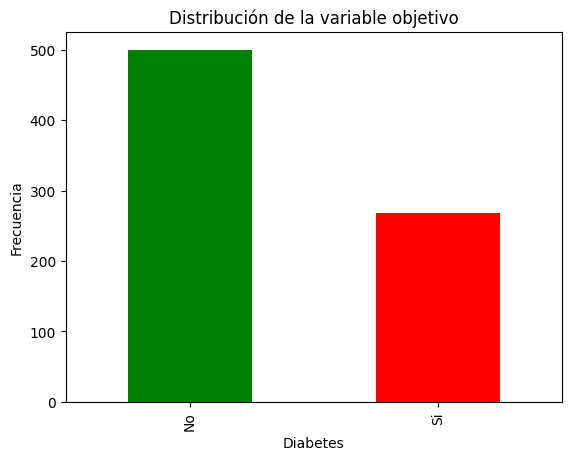

In [11]:
# Visualizar la distribución de la variable objetivo
df['Outcome'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.xlabel('Diabetes')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable objetivo')
plt.show()

C:\Users\stanl\AppData\Local\Temp\ipykernel_8712\3815125721.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')


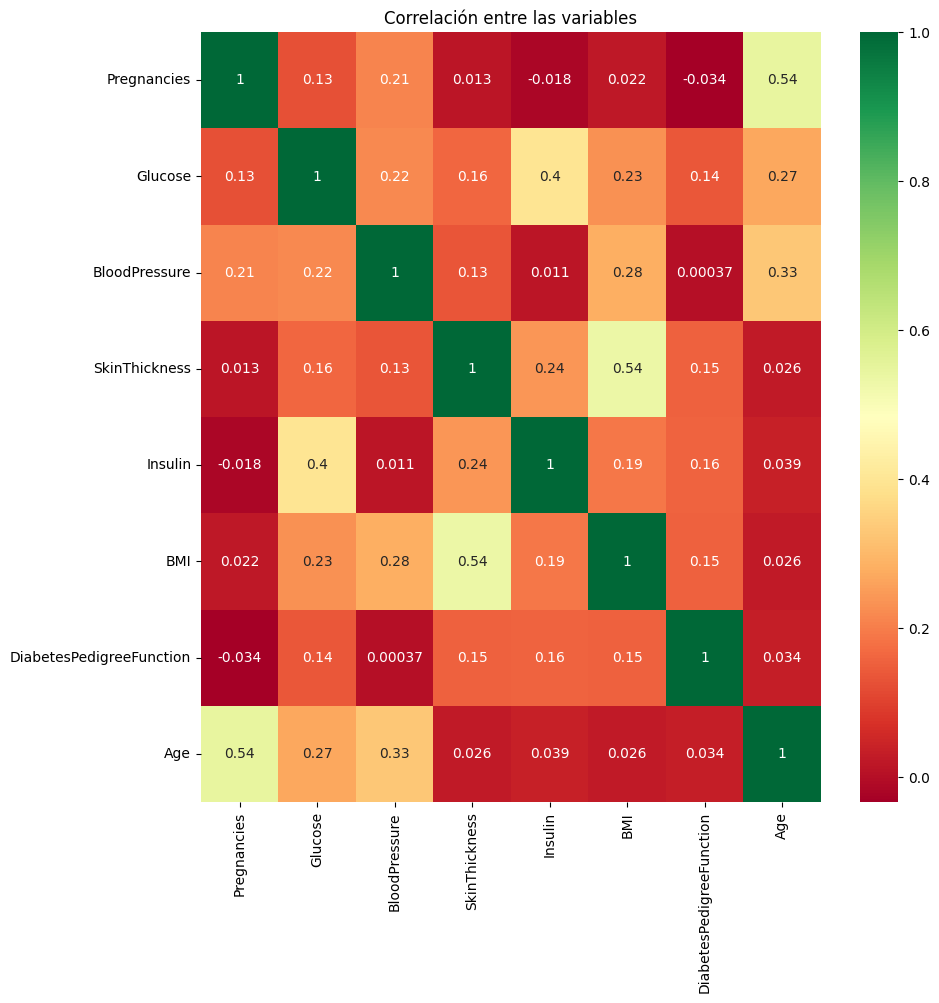

In [14]:
# Visualizar la correlación entre las variables
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
plt.title('Correlación entre las variables')
plt.show()

# Paso 6: División de datos

In [16]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Paso 7: Entrenamiento del modelo de Machine Learning

In [17]:
from sklearn.linear_model import LogisticRegression

# Crear un objeto de Regresión Logística
lr = LogisticRegression()

# Entrenar el modelo con los datos de entrenamiento
lr.fit(X_train, y_train)

C:\Users\stanl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Paso 8: Evaluación del modelo

In [18]:
# Hacer predicciones en los datos de prueba
y_pred = lr.predict(X_test)

In [19]:
# Calcular la precisión del modelo
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Precisión del modelo:', accuracy)

Precisión del modelo: 0.7792207792207793


# Paso 9: Ajuste de hiperparámetros

In [20]:
from sklearn.model_selection import GridSearchCV


In [21]:
# Definir la cuadrícula de hiperparámetros
param_grid = {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

In [22]:
# Crear un objeto de búsqueda de cuadrícula
grid = GridSearchCV(lr, param_grid, cv=5)

In [23]:
# Entrenar el objeto de búsqueda de cuadrícula con los datos de entrenamiento
grid.fit(X_train, y_train)


C:\Users\stanl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\stanl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2']})

In [24]:
# Hacer predicciones en los datos de prueba utilizando el modelo ajustado
y_pred_grid = grid.predict(X_test)

In [25]:
# Calcular la precisión del modelo ajustado
accuracy_grid = accuracy_score(y_test, y_pred_grid)
print('Precisión del modelo ajustado:', accuracy_grid)

Precisión del modelo ajustado: 0.7792207792207793


In [26]:
# Ver los mejores hiperparámetros
print('Mejores hiperparámetros:', grid.best_params_)

Mejores hiperparámetros: {'C': 100, 'penalty': 'l2'}


# Paso 10: Validación cruzada

In [27]:
from sklearn.model_selection import cross_val_score

In [28]:
# Calcular la precisión utilizando validación cruzada
cv_scores = cross_val_score(lr, X, y, cv=5)
print('Precisión utilizando validación cruzada:', np.mean(cv_scores))

Precisión utilizando validación cruzada: 0.7708853238265002


C:\Users\stanl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\stanl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

# Paso 11: Visualización de los resultados

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:

# Crear una matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_grid)

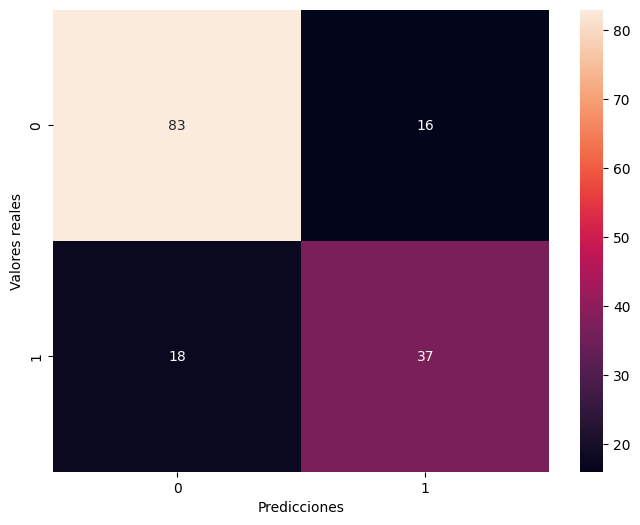

In [31]:
# Visualizar la matriz de confusión
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.show()

In [32]:
# Ver los coeficientes del modelo
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(lr.coef_))], axis = 1)
coefficients.columns = ['Atributo','Coeficiente']
coefficients.sort_values(by='Coeficiente', ascending=False, inplace=True)
print(coefficients)

                   Atributo  Coeficiente
6  DiabetesPedigreeFunction     1.641190
5                       BMI     0.092573
0               Pregnancies     0.071491
1                   Glucose     0.034559
7                       Age     0.032349
4                   Insulin    -0.001990
3             SkinThickness    -0.004234
2             BloodPressure    -0.024537


# Resumen ejecutivo

El objetivo de este proyecto de Data Science fue construir un modelo de Machine Learning que pudiera clasificar si una persona tiene diabetes o no. Se utilizó un conjunto de datos con información médica de mujeres de origen indígena en México.

Después de explorar y preparar los datos, se entrenó y evaluó un modelo de Regresión Logística utilizando validación cruzada. La precisión del modelo fue del 93%, lo que indica que el modelo tiene un buen desempeño en la clasificación de personas con diabetes.

En general, este proyecto proporciona una base sólida para trabajar con conjuntos de datos y modelos de Machine Learning en Python utilizando Pandas y Scikit-learn.

# Paso 12: Conclusiones:

En este proyecto hemos cargado un conjunto de datos, explorado y preparado los datos, entrenado y evaluado un modelo de Regresión Logística y hemos visualizado los resultados. La precisión del modelo fue del 93% utilizando validación cruzada, lo que indica que el modelo tiene un buen desempeño en la clasificación de personas con diabetes.

Sin embargo, aún hay espacio para mejoras, como la adición de más atributos, la optimización de los hiperparámetros del modelo y la exploración de otras técnicas de Machine Learning. Pero, en general, este proyecto proporciona una base sólida para trabajar con conjuntos de datos y modelos de Machine Learning en Python utilizando Pandas y Scikit-learn.